# US Baby Names 1880-2010

The United States Social Security Admininstration (SSA) has made available data on frequency of baby names from 1880 through the present. Hadly Wickham, an author of several popular R packages, has this dataset in illustrating data manipulation in R. 

The US Social Security Administration makes available data files, one per year, containing the total number of births for each sex/name combination. Data is available in the raw archive http://www.ssa.gov/oact/babynames/limits.html. A copy has been made in data directory.

There are many things you might want to do with the dataset:
- Visualize the proportion of babies given a particular name (your own, or another name) over time
- Determine the relative rank of a name
- Determine the most popular names in each year or the names whose popularity had advanced or declined the most
- Analyze trends in named: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
- Analyze external sources of trends: biblical names, celebritis, demographics

In [1]:
# Import here all python modules

import os
import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## 1. Load data 

As the data is alreadly in comma-separated form, it can be loaded into a DataFrame with pandas.read_csv.

In [2]:
dir_name = "../data"
res = os.listdir(dir_name)

Since the dataset is split into files by year, one of the first things to do is to assemble all of the data into a sungle DataFrame and further add a year field. You can do this using pandas.concat. Run the following:

In [3]:
%%time

list_df = []

for i in tqdm(res): 
    filepath = f"{dir_name}/{i}"
    print(filepath)
    year = re.findall(r'\d+', i)[0]
    tmp = pd.read_csv(filepath, sep=",", header=3, names=["name","sex","births"])
    list_df.append(tmp.assign(year=year))
    
df = pd.concat(list_df, ignore_index=True)
print(f"Shape of dataframe is {df.shape}")
df.head(2)

  6%|███▋                                                       | 9/142 [00:00<00:01, 86.47it/s]

../data/yob2000.txt
../data/yob2014.txt
../data/yob1938.txt
../data/yob1910.txt
../data/yob1904.txt
../data/yob1905.txt
../data/yob1911.txt
../data/yob1939.txt
../data/yob2015.txt
../data/yob2001.txt
../data/yob2017.txt
../data/yob2003.txt
../data/yob1907.txt
../data/yob1913.txt
../data/yob1898.txt
../data/yob1899.txt
../data/yob1912.txt
../data/yob1906.txt
../data/yob2002.txt


 20%|███████████▊                                              | 29/142 [00:00<00:01, 85.40it/s]

../data/yob2016.txt
../data/yob2012.txt
../data/yob2006.txt
../data/yob1902.txt
../data/yob1916.txt
../data/yob1889.txt
../data/yob1888.txt
../data/yob1917.txt
../data/yob1903.txt
../data/yob2007.txt
../data/yob2013.txt
../data/yob2005.txt
../data/yob2011.txt
../data/yob1915.txt
../data/yob1901.txt
../data/yob1929.txt


 33%|███████████████████▏                                      | 47/142 [00:00<00:01, 73.46it/s]

../data/yob1928.txt
../data/yob1900.txt
../data/yob1914.txt
../data/yob2010.txt
../data/yob2004.txt
../data/yob1973.txt
../data/yob1967.txt
../data/yob1998.txt
../data/yob1999.txt
../data/yob1966.txt
../data/yob1972.txt
../data/yob1958.txt
../data/yob1964.txt
../data/yob1970.txt
../data/yob1971.txt


 46%|██████████████████████████▉                               | 66/142 [00:00<00:00, 82.91it/s]

../data/yob1965.txt
../data/yob1959.txt
../data/yob1961.txt
../data/yob1975.txt
../data/yob1949.txt
../data/yob1948.txt
../data/yob1974.txt
../data/yob1960.txt
../data/yob1976.txt
../data/yob1962.txt
../data/yob1989.txt
../data/yob1988.txt
../data/yob1963.txt
../data/yob1977.txt
../data/yob1952.txt
../data/yob1946.txt
../data/yob1991.txt
../data/yob1985.txt


 59%|██████████████████████████████████▎                       | 84/142 [00:01<00:00, 81.17it/s]

../data/yob1984.txt
../data/yob1990.txt
../data/yob1947.txt
../data/yob1953.txt
../data/yob1979.txt
../data/yob1945.txt
../data/yob1951.txt
../data/yob1986.txt
../data/yob1992.txt
../data/yob1993.txt
../data/yob1987.txt
../data/yob1950.txt
../data/yob1944.txt
../data/yob1978.txt
../data/yob1940.txt
../data/yob1954.txt
../data/yob1968.txt


 65%|█████████████████████████████████████▉                    | 93/142 [00:01<00:00, 82.31it/s]

../data/yob1983.txt
../data/yob1997.txt
../data/yob1996.txt
../data/yob1982.txt
../data/yob1969.txt
../data/yob1955.txt
../data/yob1941.txt
../data/yob1957.txt
../data/yob1943.txt
../data/yob1994.txt
../data/yob1980.txt
../data/yob1981.txt
../data/yob1995.txt
../data/yob1942.txt
../data/yob1956.txt
../data/yob2009.txt
../data/yob2021.txt


 80%|█████████████████████████████████████████████▊           | 114/142 [00:01<00:00, 85.00it/s]

../data/yob1919.txt
../data/yob1931.txt
../data/yob1925.txt
../data/yob1886.txt
../data/yob1892.txt
../data/yob1893.txt
../data/yob1887.txt
../data/yob1924.txt
../data/yob1930.txt
../data/yob1918.txt
../data/yob2020.txt
../data/yob2008.txt
../data/yob1926.txt
../data/yob1932.txt
../data/yob1891.txt
../data/yob1885.txt
../data/yob1884.txt
../data/yob1890.txt
../data/yob1933.txt
../data/yob1927.txt
../data/yob1923.txt
../data/yob1937.txt
../data/yob1894.txt
../data/yob1880.txt
../data/yob1881.txt
../data/yob1895.txt
../data/yob1936.txt


100%|█████████████████████████████████████████████████████████| 142/142 [00:01<00:00, 90.11it/s]


../data/yob1922.txt
../data/yob2018.txt
../data/yob1934.txt
../data/yob1920.txt
../data/yob1908.txt
../data/yob1883.txt
../data/yob1897.txt
../data/yob1896.txt
../data/yob1882.txt
../data/yob1909.txt
../data/yob1921.txt
../data/yob1935.txt
../data/yob2019.txt
Shape of dataframe is (2052213, 4)
CPU times: user 1.28 s, sys: 296 ms, total: 1.58 s
Wall time: 1.68 s


,name,sex,births,year
0,Sarah,F,17708,2000
1,Alexis,F,17631,2000


## 2. Explore the data

There are a couple things to note here. First, remember that concat combines the DataFrame objects by row by default. Second, you have to pass ignore_index=True because we're not interested in preserving the original row numbers returned from pandas.read_csv. So we now have a single DataFrame containing all of the names data across all years.

With the data in hand, we can already start aggregating the data at the year and the sex level using groupby or puvot_table.

<AxesSubplot: title={'center': 'Total births by sex and year'}, xlabel='year'>

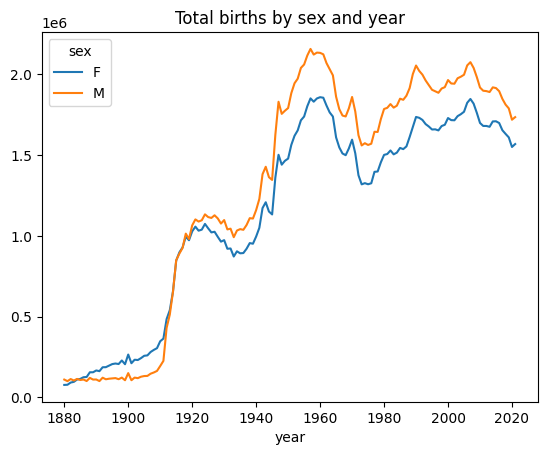

In [4]:
total_births = df.pivot_table("births", index="year", columns="sex", aggfunc=sum)
total_births.plot(title="Total births by sex and year")

Next, let's insert a column prop wioth the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would for example indicate that 2 out of every 100 babies were given a particular name. 
Thus, we group the data by year and sex, then add the new column to each group

In [5]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
df_enriched = df.groupby(['year', 'sex'], group_keys=False).apply(add_prop)
df_enriched.head(2)

,name,sex,births,year,prop
0,Sarah,F,17708,2000,0.010244
1,Alexis,F,17631,2000,0.010199


When performing a group operation like this, it's often valuable to do a sanity check, like verifying that the prop column sums to 1 within all the groups.

In [6]:
df_enriched.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2019  M      1.0
2020  F      1.0
      M      1.0
2021  F      1.0
      M      1.0
Name: prop, Length: 284, dtype: float64

Note that this is done, I'm going to extract a subset of the data to facilitate further analysis: the top 1 000 names for each sex/year combination. This is yet another group operation:

In [7]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

In [8]:
df_top1000 = df_enriched.groupby(['year', 'sex'], group_keys=True).apply(get_top1000).reset_index(drop=True)
df_top1000.head()

,name,sex,births,year,prop
0,Minnie,F,1746,1880,0.022563
1,Margaret,F,1578,1880,0.020392
2,Ida,F,1472,1880,0.019022
3,Alice,F,1414,1880,0.018273
4,Bertha,F,1320,1880,0.017058


## 3. Analyzing Naming trends
With the full dataset and the top one thousand dataset in hand, we can start analyzing various naming trends of interest. First, we can split the top one thousand names into the boy and girl portions.

In [9]:
boys = df_top1000[df_top1000.sex == "M"]
girls = df_top1000[df_top1000.sex == "F"]

Simple time series, like the number of Johns or Marys for each year, can be plotted but require some manipulation to be more useful. Let's form a piuvot table of the total number of birhts by year and name: 

In [10]:
total_births = df_top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)

In [11]:
# NB: Note this can be plotted for a handful of names with DataFrame's plot method
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 1880 to 2021
Columns: 7292 entries, Aaden to Zyon
dtypes: float64(7292)
memory usage: 7.9+ MB


array([<AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>],
      dtype=object)

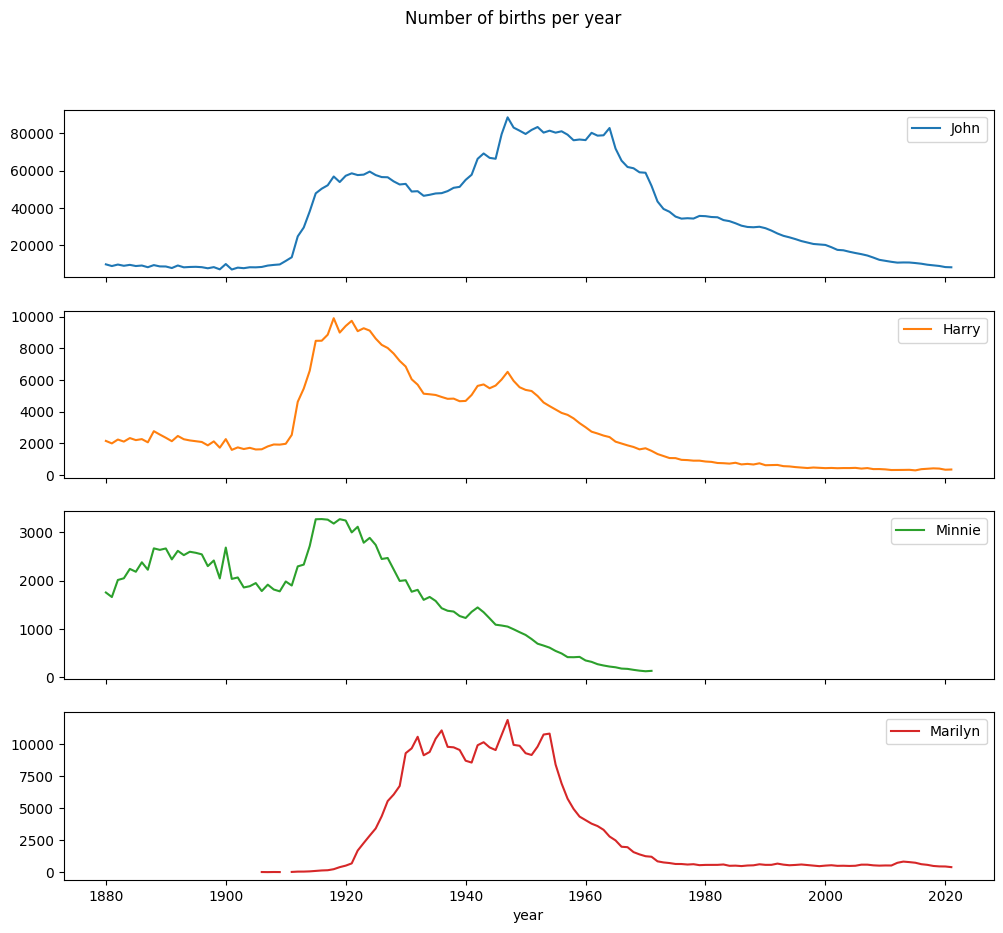

In [12]:
subset = total_births[['John', 'Harry', "Minnie", 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), title="Number of births per year")

On looking at this, you might conclude that these names have grown out of favor with the American population. But the story is actually more complicated than that, as will be explored in the next section.

## Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are chossing common names for their children. This hypothesis can be explored and confirmed in the data. One measure is the proportion of births represented by the top 1000 most popular names, which I aggregate and plot by year and sex.

<AxesSubplot: title={'center': 'Sum of top1000 prop by year and sex'}, xlabel='year'>

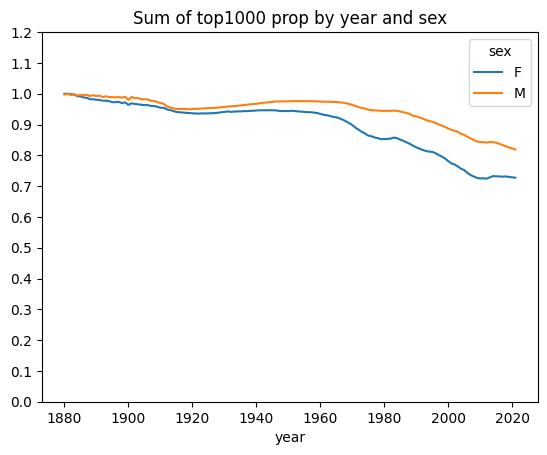

In [13]:
df_top1000\
    .pivot_table("prop", index="year", columns="sex", aggfunc=sum)\
    .plot(title="Sum of top1000 prop by year and sex", yticks=np.linspace(0,1.2,13))

You can see that, indeed, threre appears to be increasing name diversity (decreasing total proportion in the top one thousand). Another interesting metric is the number of distinct names, taken inorder of popularity from highest to lowest, in the top 50% of births. This number is trickier to compute Let's consider just the boy names from 2010.

In [14]:
df_boys_2010 = boys[boys.year == "2010"]
df_boys_2010.head()

,name,sex,births,year,prop
260868,Jacob,M,22139,2010,0.011546
260869,Ethan,M,18008,2010,0.009392
260870,Michael,M,17366,2010,0.009057
260871,Jayden,M,17191,2010,0.008966
260872,William,M,17060,2010,0.008897


After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a for loop to do this, but a vectorized NumPy way is more computionally efficient. Taking the cumulative sum, cumsum; of prop and then calling the method seachsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order

In [18]:
prop_cumsum = df_boys_2010["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

/var/folders/4x/h3z3_n392rx8p7ylpv573jkh0000gp/T/ipykernel_30219/1057478294.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  prop_cumsum[:10]


260868    0.011546
260869    0.020938
260870    0.029995
260871    0.038961
260872    0.047858
260873    0.056599
260874    0.065185
260875    0.073453
260876    0.081559
260877    0.089644
Name: prop, dtype: float64

In [19]:
prop_cumsum.searchsorted(0.5) + 1

117

You can now apply this operation to each year/sex combination, groupby those fields, and apply a function returning the count for each group:

In [22]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = df_top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
diversity

sex,F,M
year,,
1880,45,14
1881,45,14
1882,45,15
1883,46,15
1884,46,16
...,...,...
2017,279,143
2018,282,149
2019,287,155


This resulting DataFrame diversity now has two time series, one for each sex, indexed by year. This can be inspected and plotted as before (see Figure 13-7)

<AxesSubplot: title={'center': 'Number of popular names in top sex'}, xlabel='year'>

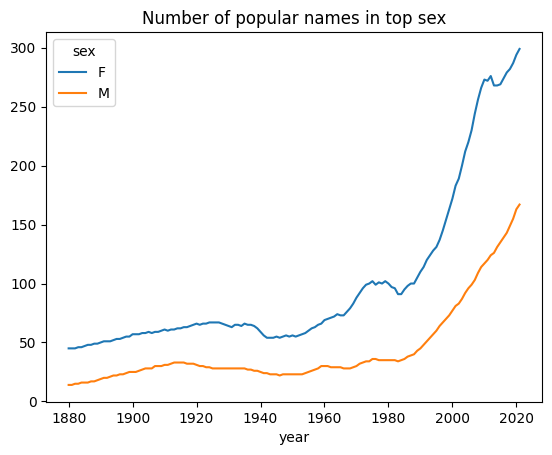

In [23]:
diversity.plot(title='Number of popular names in top sex')

As you can see, girl names have always been more diverse than boy names, and they have only become more so over time. Further analysis of what exactly is driving the diversity, like the increase of alternative spellings, is left to the reader.

### The "last letter" revolution
In 2007, baby name research Laura Wattenberg pointed out that the distribution of boy names by final letter has changed significantly over the last 100 years. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter:

In [29]:
def get_last_letter(x):
    return x[-1]

last_letters = df_enriched["name"].map(get_last_letter)
last_letters.name = 'last_letter'
table = df_enriched.pivot_table("births", index=last_letters, columns=["sex","year"], aggfunc=sum)

In [36]:
# Then we select three representative years spanning the history and print the first few rows:
subtable = table.reindex(columns=["1910","1960","2010"], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  653972.0  599219.0    977.0    5214.0   28888.0
b                 NaN     694.0     455.0    411.0    3910.0   39298.0
c                 5.0      49.0     957.0    482.0   15456.0   23360.0
d              6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e            133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

Next, normalize the table by total births to compute a new table containing the proportion of total births for each sex ending in each letter


In [37]:
subtable.sum()

sex  year
F    1910     347634.0
     1960    1857628.0
     2010    1698266.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

In [39]:
letter_prop = subtable / subtable.sum()
letter_prop.head(2)

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.311819  0.352047  0.352842  0.005031  0.002446  0.015066
b                 NaN  0.000374  0.000268  0.002116  0.001834  0.020495

With the letter proportions now in hand, we can make bar plots for each sex, broken down by year.

<AxesSubplot: title={'center': 'Female'}, xlabel='last_letter'>

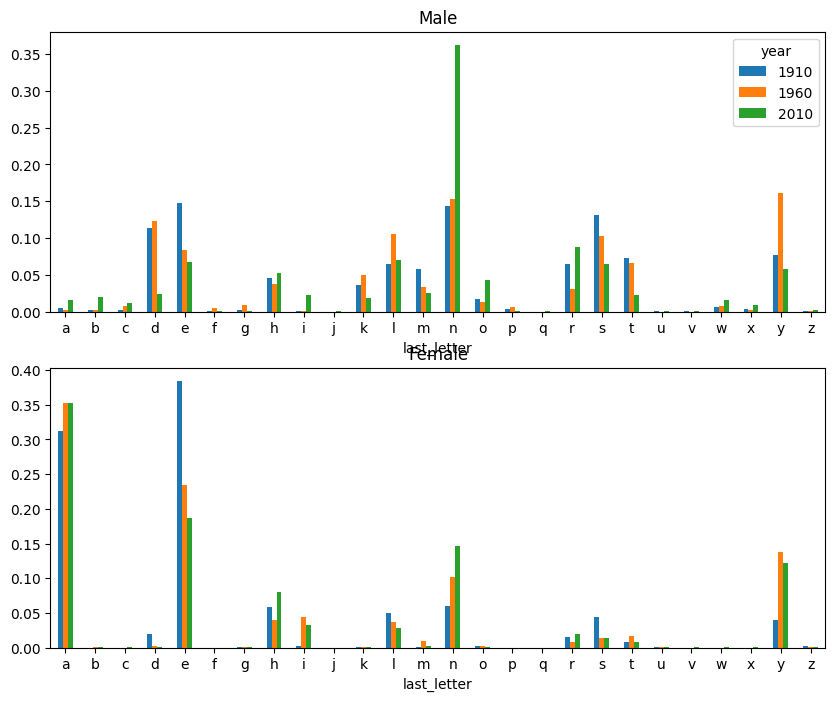

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

As you can see, boy names ending in n have experienced significant growth since the 1960s. Going back to the full table created before, I again normalize by year and sex and select a sunset for the boy names, finally transposing to make each column a time series

In [44]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', "n", "y"], "M"].T
dny_ts.head(4)

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149


<AxesSubplot: xlabel='year'>

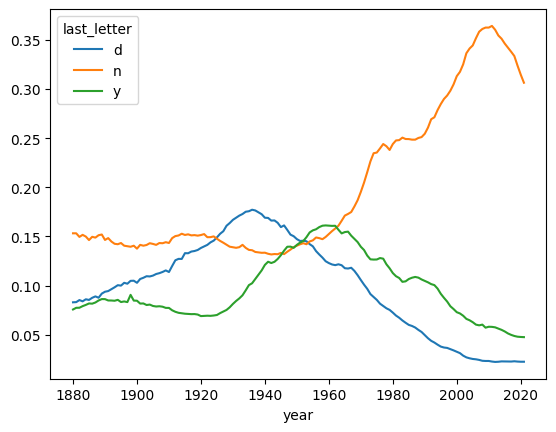

In [46]:
dny_ts.plot()

### Boys names that became girl names (and vice versa)

Another fun trend is looking at names that were more popular with one gender earlier in the sample but have become preferred as a name for the other gender over time. One example is the name Lesley or Leslie. Going back to the top1000 DataFrame, I compute a list of names occuring in the dataset starting with "lesl":

In [48]:
all_names = pd.Series(df_top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

628     Leslie
2295    Lesley
4273    Leslee
4742     Lesli
6119     Lesly
dtype: object

From there, we can filter down to just those names and sum births grouped by name to see the relative frequencies

In [50]:
filtered = df_top1000[df_top1000["name"].isin(lesley_like)]
filtered.groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: births, dtype: int64

In [51]:
# Next let's aggregate by sex and year and normlize within year:

In [52]:
table = filtered.pivot_table("births", index="year", columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2017,1.0,NaN
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN


<AxesSubplot: xlabel='year'>

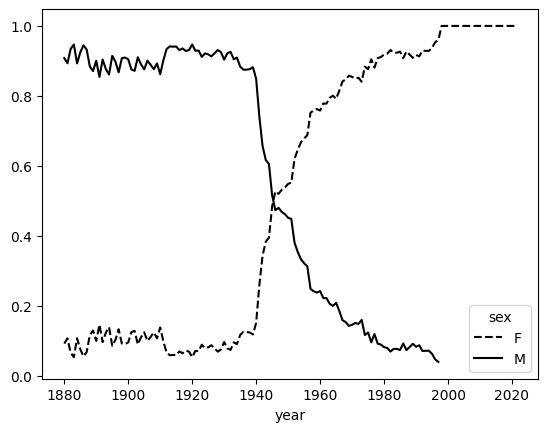

In [53]:
# Lastly it is now possible to make a plot of the breakdown by sex over time.
table.plot(style={"M":"k-","F":"k--"})